In [382]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [383]:
data = pd.read_csv("patient.csv")

### Cleaning up the data!


In [384]:
data.duplicated().sum()

1

There are 1 duplicated row

In [385]:
data = data.drop_duplicates() #remove duplicate

In [386]:
data.duplicated().sum()#checking again

0

#### Missing Values

In [387]:
#Checking Null Values
for col in data.columns:
    pct_missing = data[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

patient_id - 0.0%
first_name - 0.0%
last_name - 0.0%
age - 0.0%
email - 0.0%
phone - 0.0%
address - 0.0%
surgery_done - 0.0%
assigned_room - 0.0%
no_of_nights - 0.0%
is_discharged - 0.0%
employee_id - 0.0%
check_in_time - 0.0%
appointment_end_time - 0.0%


there is no missing values 

#### Convert column with proper datatype

In [388]:
data['check_in_time'] = pd.to_datetime(data['check_in_time'])
data['appointment_end_time'] = pd.to_datetime(data['appointment_end_time'])


In [389]:
#creating a separate column for check in day
data['Day'] = data['check_in_time'].dt.day_name()


In [390]:
data.head()

,patient_id,first_name,last_name,age,email,phone,address,surgery_done,assigned_room,no_of_nights,is_discharged,employee_id,check_in_time,appointment_end_time,Day
0,2000,Johnny,Ling,25,johnnylang@gmail.com,(234)347-8970,123 Main St Boston MA,Yes,General ward,3,Yes,17001,2023-01-20 10:26:12,2023-01-20 11:26:12,Friday
1,2001,Simphon,Everest,64,simphon78@gmail.com,(617)346-9349,456 Oak St Virginia,No,Private ward,7,No,17002,2023-01-21 13:59:53,2023-01-21 14:29:53,Saturday
2,2002,Erik,Douglas,45,erik33@gmai.com,(857)546-4568,789 Park Ave Boston MA,Yes,Premium Deluxe,5,Yes,17003,2023-01-20 03:05:49,2023-01-20 03:35:49,Friday
3,2003,Charles,Simon,34,simonc@yahoo.com,(857)469-0980,333 Pine St Boston MA,Yes,Private ward,9,Yes,17004,2023-01-20 08:46:08,2023-01-20 09:16:08,Friday
4,2004,James,Mitchel,22,jamesmitchell@gmail.com,(857)846-0987,812 Willow St Virginia,No,Premium Deluxe,2,No,17011,2023-01-21 04:15:39,2023-01-21 04:45:39,Saturday


#### 1) What time should we increase staff count  in the hospital to maximize patient's care?

In [391]:
data['Hour']=data['check_in_time'].dt.hour

In [392]:
busytime = data.groupby('Hour').count().reset_index()

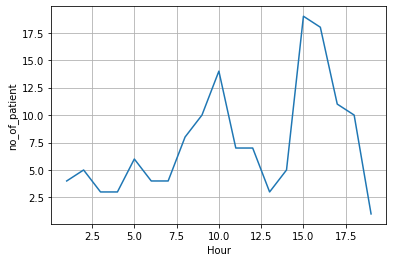

In [393]:
from matplotlib.ticker import StrMethodFormatter
plt.plot(busytime['Hour'],busytime['patient_id'])
plt.xlabel('Hour')
plt.ylabel('no_of_patient')
plt.grid()
plt.show()

Based on the data analysis, it appears that patients tend to check into the hospital more frequently between the hours of 2:30 PM and 6PM. One possible explanation for this trend is that during these hours, traffic is typically heavier in Boston, which may result in an increased likelihood of accidents and injuries requiring medical attention. However, further research would be needed to confirm this hypothesis.

By increasing the number of staff during the peak check-in hours, the hospital may be able to improve the overall patient experience by reducing wait times and ensuring that patients receive timely medical attention. However, it's important to note that increasing staffing levels can also be costly, so any decisions to do so should be carefully evaluated in light of the hospital's budget constraints and patient demand.

#### 2) which day has more number of cases?

In [394]:
dayCases = data.groupby('Day').count()[['patient_id']].reset_index()
dayCases.sort_values(by='Day')

,Day,patient_id
0,Friday,56
1,Monday,5
2,Saturday,56
3,Sunday,3
4,Thursday,6
5,Tuesday,9
6,Wednesday,7


The data shows a higher incidence of medical cases being reported on Fridays and Saturdays, which may be attributed to the fact that these days mark the end of the work week and people are more likely to be out socializing and engaging in recreational activities, which could lead to accidents. Additionally, the consumption of alcohol during parties and other gatherings may contribute to an increase in the number of accidents, including those resulting from drunk driving.



#### 3) If we were to choose a doctor of the month based on the number of patients they have treated, which doctor would we select?

now since we don't have employee name in patient.csv , we can import Staff.csv file in order to get the name of the doctor

In [395]:
staff = pd.read_csv("staff.csv")

Let's first check which doctor has maximum count of patient

In [396]:
patient_count = data.groupby('employee_id').count().reset_index().sort_values(by = 'patient_id',ascending=False ).head(1)[['employee_id','patient_id']]
patient_count

,employee_id,patient_id
1,17002,13


we can see that employee_with id 17002 has checked max number of patient in the month of january so we choose him 

now to get his name, lets find it in Staff table 

In [397]:
doctor_of_the_month = staff[staff['employee_id']==17002]
doctor_of_the_month

,employee_id,branch_id,employee_first_name,employee_last_name,designation,email,phone_no,department_id
1,17002,16001,Ella,Grey,Doctor,ella.gr@srk.org,(857)234-3554,102


#### So as per our findings we came to know that , Ella Grey is the doctor of the month

now let's find out which department is she from 

In [398]:
department = pd.read_csv("department.csv")#import department table

since we know that the department id for ELLA GREY is 102

In [399]:
winningDepartment = department[department['department_id'] == 102]
winningDepartment

,department_id,name
1,102,Gynecology


Ella Grey is from Gynecology department, Now let's have all the information together

In [400]:
winner = pd.merge(doctor_of_the_month, winningDepartment, on='department_id') #merging the table
winner = winner.rename(columns={'name': 'department_name'})
winner

,employee_id,branch_id,employee_first_name,employee_last_name,designation,email,phone_no,department_id,department_name
0,17002,16001,Ella,Grey,Doctor,ella.gr@srk.org,(857)234-3554,102,Gynecology
